## Venkatesh Boddupalli_ICP11 Autoencoder

In [1]:
import numpy as np

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


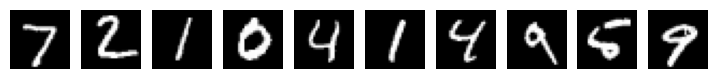

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Create an autoencoder model with bottle neck having 6 neurons

In [4]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
 dense_4 (Dense)             (None, 100)               700       
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

### Train the autoencoder model.

In [5]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 26s 47ms/step - loss: 0.2238 - val_loss: 0.1874
Epoch 2/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1748 - val_loss: 0.1634
Epoch 3/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1598 - val_loss: 0.1563
Epoch 4/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1546 - val_loss: 0.1530
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1513 - val_loss: 0.1507
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1490 - val_loss: 0.1490
Epoch 7/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1470 - val_loss: 0.1471
Epoch 8/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1454 - val_loss: 0.1457
Epoch 9/10
469/469 [==============================] - 19s 40ms/step - loss: 0.1437 - val_loss: 0.1448
Epoch 10/10
469/469 [==============================] - 21s 44ms/step - loss: 0.142

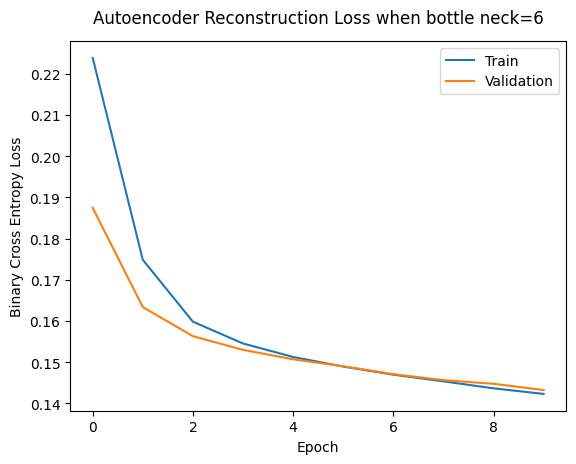

In [6]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss when bottle neck=6', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 6ms/step


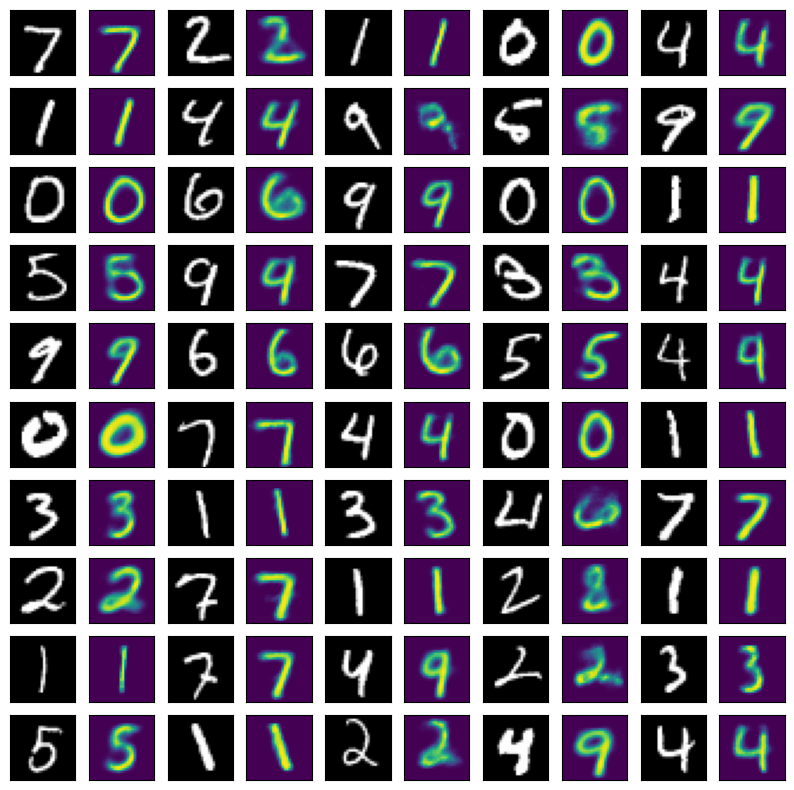

In [7]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

## Create an autoencoder model with bottle neck having 100 neurons

In [8]:


input_dim = 28*28
latent_vec_len = 100 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

### Train the autoencoder model

In [9]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)

Epoch 1/10
469/469 [==============================] - 20s 39ms/step - loss: 0.1804 - val_loss: 0.1235
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1128 - val_loss: 0.1031
Epoch 3/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0989 - val_loss: 0.0935
Epoch 4/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0927 - val_loss: 0.0895
Epoch 5/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0888 - val_loss: 0.0868
Epoch 6/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0863 - val_loss: 0.0859
Epoch 7/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0843 - val_loss: 0.0843
Epoch 8/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0829 - val_loss: 0.0822
Epoch 9/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0818 - val_loss: 0.0811
Epoch 10/10
469/469 [==============================] - 18s 39ms/step - loss: 0.080

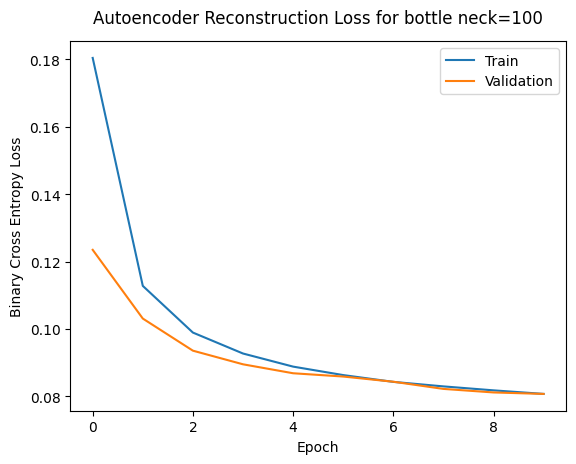

In [10]:
# Plot training and validation loss scores
# against the number of epochs.

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss for bottle neck=100', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 7ms/step


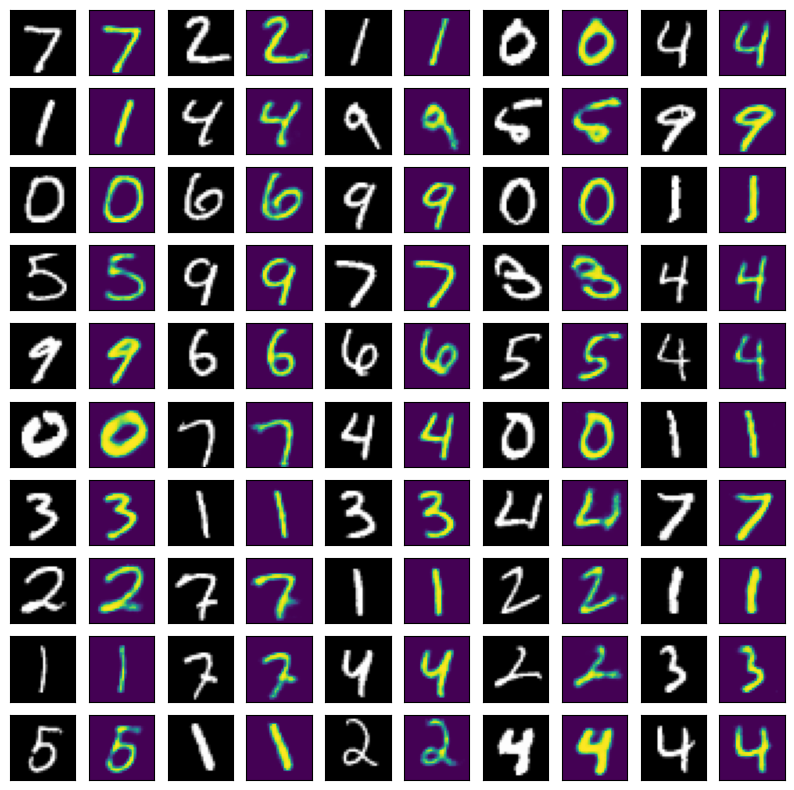

In [11]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Inference
### Here we are looking at the Binary cross-entropy loss from the plots as an evaluation metric to compare the performance of autoencoder models with different bottleneck sizes 6 and 100.
### The plots show that the binary cross-entropy loss decreases rapidly and stabilizes at a low value(approx 0.08) for the model with a bottleneck of 100, while the loss for the model with a bottleneck of 6 decreases more slowly and stabilizes at a slightly higher value(approx 0.14), it can be inferred that the model with a bottleneck of 100 is performing better in terms of reconstructing the input data.